# Ecuación del calor
#### https://meet.noysi.com/metodosnumericos2

Vamos a utilizar el método explícito para resolver la ecuación del calor
$$
\begin{cases}
u_{xx}(t,x)=u_t(t,x),\quad &(t\geq 0,\quad 0\leq x\leq 1)\\
u(0,x)=g(x),\quad &(0\leq x\leq 1)\\
u(t,0)=a(t),\quad &(t\geq 0)\\
u(t,1)=b(t),\quad &(t\geq 0)
\end{cases}
$$
con 
$$
g(x)=x(1-x),\quad a(t)=0,\quad b(t)=1-\frac{1}{t+1}.
$$
Aproximaremos la solución para $t\leq T$, donde $T$ es un valor fijado. 

In [1]:
# Fijamos las condiciones fronteras 
g(x)=1.0*x*(1-x)
a(t)=0
b(t)=1-1/(t+1)

In [8]:
# Definimos los puntos de la malla
T = 1. # Tiempo final
N = 5
M = 100
h = 1.0/(N+1)
k = T/M

Aunque no necesitamos calcular explícitamente los puntos de la malla, vamos a hacerlo para poder representarlos.

In [9]:
vx = [h*i for i in [0 .. N+1]]
vt = [k*i for i in [0 .. M]]
puntos = [(px,pt) for px in vx for pt in vt]
point(puntos)

A continuación vamos a definir la matriz del método.

In [11]:
s = k/h^2
A = (1-2*s)*matrix.identity(N,sparse=true)
for i in [1..N-1]:
    A[i-1,i] = s
    A[i,i-1] = s
show(A)

[0.280000000000000 0.360000000000000 0.000000000000000 0.000000000000000 0.000000000000000]
[0.360000000000000 0.280000000000000 0.360000000000000 0.000000000000000 0.000000000000000]
[0.000000000000000 0.360000000000000 0.280000000000000 0.360000000000000 0.000000000000000]
[0.000000000000000 0.000000000000000 0.360000000000000 0.280000000000000 0.360000000000000]
[0.000000000000000 0.000000000000000 0.000000000000000 0.360000000000000 0.280000000000000]

Para aplicar el método, basta aplicar la matriz a los valores en el tiempo anterior, incorporando en el término independiente las condiciones en la frontera. Definimos una matriz C donde guardaremos los valores aproximados. En la primera fila pondremos los valores en la frontera $t=0$ y en la primera y última columna los valores en los bordes.

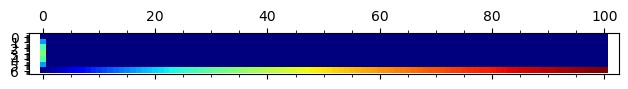

In [12]:
C = Matrix(RDF,M+1,N+2)
C[0,:] = vector([g(i*h) for i in [0..N+1]]) 
for i in [1..M]:
    ti = i*k
    C[i,0] = a(ti)
    C[i,-1] = b(ti)
matrix_plot(C.transpose(),cmap='jet')

Ahora calculamos las aproximaciones en los distintos tiempos aplicando repetidamente la matriz. Como en el vector no están recogidas las condiciones frontera, hay que considerarlas por separado.

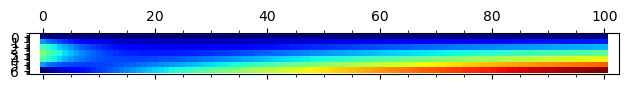

In [13]:
v0 = vector(C[0,1:N+1])
for i in [1..M]:
    v0 = A*v0
    v0[0]  += s*a((i-1)*k)
    v0[-1] += s*b((i-1)*k)
    C[i,1:N+1] = v0
matrix_plot(C.transpose(),cmap='jet')

Podemos representar la termperatura a lo largo del tiempo mediante una animación.

In [14]:
graficas0 = [line(zip([0,h..1],u),ymin=0,ymax=1) for u in C[0:-1:5]]
animacion = animate(graficas0)

Animation with 20 frames
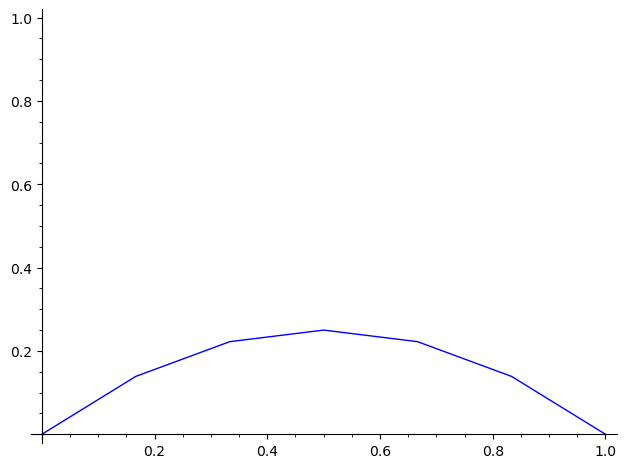

In [15]:
animacion.show()

### Ejercicios
1. Aumenta el número de divisiones en el eje $x$. ¿Qué ocurre? ¿A qué se debe? Calcula los autovalores de $A$.
2. Cambia el método por el método implícito, con los mismos puntos que en el caso anterior. Prueba aumentar el número de divisiones en el eje $x$. Calcula de nuevo los autovalores de la matriz (en este caso, de la matriz inversa). 
3. Aplica ambos métodos con $a(t)=b(t)=0$. A partir de la matriz del método y las condiciones frontera, calcula el último paso en una única instrucción. 
4. Implementa el método de Crank-Nicolson y pruébalo en los casos anteriores.

### 1

In [33]:
# Fijamos las condiciones fronteras 
g(x)=1.0*x*(1-x)
a(t)=0
b(t)=1-1/(t+1)

In [37]:
# Definimos los puntos de la malla
T = 1. # Tiempo final
N = 7
M = 100
h = 1.0/(N+1)
k = T/M

In [38]:
# Condiciones frontera
C = Matrix(RDF,M+1,N+2)
C[0,:] = vector([g(i*h) for i in [0..N+1]]) 
for i in [1..M]:
    ti = i*k
    C[i,0] = a(ti)
    C[i,-1] = b(ti)

In [39]:
# Matriz del método
s = k/h^2
A = (1-2*s)*matrix.identity(N,sparse=true)
for i in [1..N-1]:
    A[i-1,i] = s
    A[i,i-1] = s

In [40]:
# Método
v0 = vector(C[0,1:N+1])
for i in [1..M]:
    v0 = A*v0
    v0[0]  += s*a((i-1)*k)
    v0[-1] += s*b((i-1)*k)
    C[i,1:N+1] = v0
matrix_plot(C.transpose(),cmap='jet')

Animation with 30 frames
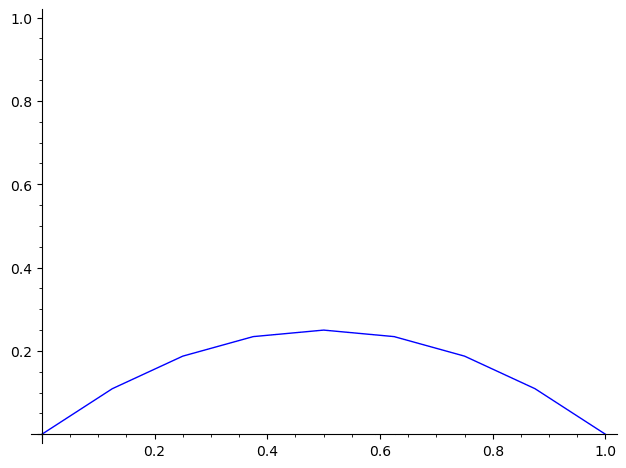

In [41]:
graficas0 = [line(zip([0,h..1],u),ymin=0,ymax=1) for u in C[0:30]]
animacion = animate(graficas0)
animacion.show()

In [42]:
A.eigenvalues()

/tmp/ipykernel_26927/2072937010.py:1: UserWarning: Using generic algorithm for an inexact ring, which will probably give incorrect results due to numerical precision issues.
  A.eigenvalues()


[0.902565801614447, 0.625096679918781, 0.209834793427315, -0.280000000000000, -0.769834793427315, -1.18509667991878, -1.46256580161445]

### 2

In [66]:
# Fijamos las condiciones fronteras 
g(x)=1.0*x*(1-x)
a(t)=0
b(t)=1-1/(t+1)

In [115]:
# Definimos los puntos de la malla
T = 1. # Tiempo final
N = 200
M = 200
h = 1.0/(N+1)
k = T/M

In [116]:
# Condiciones frontera
C = Matrix(RDF,M+1,N+2)
C[0,:] = vector([g(i*h) for i in [0..N+1]]) 
for i in [1..M]:
    ti = i*k
    C[i,0] = a(ti)
    C[i,-1] = b(ti)

In [117]:
# Matriz del método
s = k/h^2
A = (1+2*s)*matrix.identity(N,sparse=true)
for i in [1..N-1]:
    A[i-1,i] = -s
    A[i,i-1] = -s

CPU times: user 14.3 s, sys: 31.9 ms, total: 14.4 s
Wall time: 14.3 s


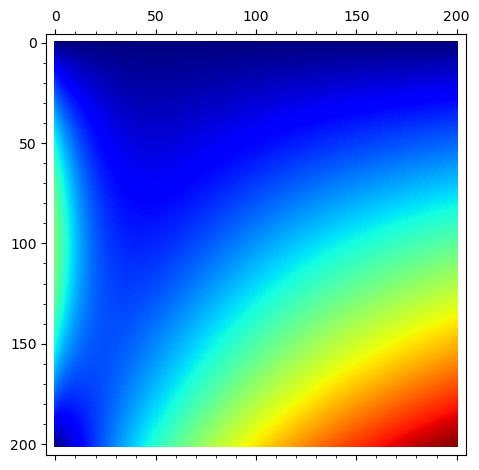

In [118]:
%%time
# Método
v0 = vector(C[0,1:N+1])
Ai = A.inverse()
for i in [1..M]:
    v0[0]  += s*a(i*k)
    v0[-1] += s*b(i*k)
    v0 = Ai*v0
    C[i,1:N+1] = v0
matrix_plot(C.transpose(),cmap='jet')

CPU times: user 162 ms, sys: 0 ns, total: 162 ms
Wall time: 160 ms


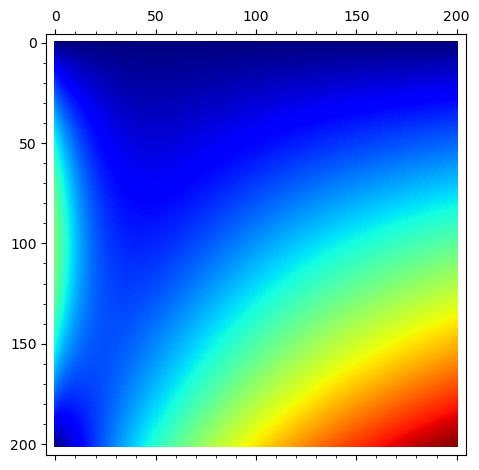

In [119]:
%%time
import numpy as np
from scipy.sparse import diags, identity
from scipy.sparse.linalg import spsolve

# Crear la matriz A dispersa
diagonals = [
    np.ones(N) * (1 + 2 * s),  # Diagonal principal
    np.ones(N - 1) * (-s),        # Diagonal superior
    np.ones(N - 1) * (-s)         # Diagonal inferior
]

A = diags(diagonals, [0, 1, -1], format='csc')  # Formato disperso 'csc'
v0 = vector(C[0,1:N+1])

# Vector b ejemplo (puedes definir el tuyo según sea necesario)
v0 = np.array(list(v0))

for i in [1..M]:
    v0[0]  += s*a((i)*k)
    v0[-1] += s*b((i)*k)
    v0 = spsolve(A, v0)
    C[i,1:N+1] = vector(v0)
matrix_plot(C.transpose(),cmap='jet')

# Problema de Dirichlet

Consideremos la ecuación de Laplace en un cuadrado,
$$
\begin{cases}
&\nabla^2u=0\\
&u(x,0)=a(x),\quad u(x,1)=b(x),\\
&u(0,y)=c(y),\quad u(1,y)=d(y).
\end{cases}
$$

Tomaremos valores frontera nulos y dividiremos la región en 9 cuadrados, es decir, tomamos $n=2$.

In [22]:
n = 2

Tenemos que resolver el sistema lineal 
$$
4 u_{i,j}-u_{i-1,j}-u_{i,j-1}-u_{i+1,j}-u_{i,j+1}=0,\quad 1\leq i,j\leq 2,
$$
La matriz de dicho sistema es una matriz de $n^2\times n^2$. Las incógnitas están escritas en forma de una matriz, pero necesitamos escribirlas como un vector. Consideraremos el vector que se obtiene concatenando todas las filas. Creamos una función auxiliar que nos dé la posición de un elemento de la matriz en dicho vector.

In [23]:
def pos(i,j,n):
    return i+j*n

Ahora ya podemos definir la matriz y el vector de términos independientes.

In [24]:
A = matrix.zero(n^2,sparse=true)
b = vector([0]*n^2)
for i in range(n):
    for j in range(n):
        pij = pos(i,j,n)
        A[pij,pij] = 4
        if i>0:
            A[pij,pos(i-1,j,n)]=-1
        if j>0:
            A[pij,pos(i,j-1,n)]=-1
        if i<n-1:
            A[pij,pos(i+1,j,n)]=-1
        if j<n-1:
            A[pij,pos(i,j+1,n)]=-1
show(A)

[ 4 -1 -1  0]
[-1  4  0 -1]
[-1  0  4 -1]
[ 0 -1 -1  4]

Resolviendo el sistema, obtenemos el vector solución, que tenemos que convertir de nuevo en matriz.

In [25]:
v = A\b
U = matrix([v[i*n:i*n+n] for i in range(n)])
show(U)

[0 0]
[0 0]

En este caso, como era de esperar, obtenemos la solución nula. 

### Reconstrucción de una imagen
Veamos una aplicación de la resolución del problema de Dirichlet para la ecuación de Laplace para rellenar huecos en una imagen

In [26]:
# Cargamos una imagen de la librería, así como las funciones necesarias
import numpy as np
from scipy import signal
import scipy.datasets
A = scipy.datasets.ascent()
matrix_plot(-A)

Vamos a crear agujeros aleatorios en la imagen. Es equivalente a poner a cero posiciones de la matriz. Dichas posiciones las guardamos en una matriz $B$, que usaremos para reconstruir la matriz $A$. 

Si partiésemos de una imagen con agujeros, el primer paso sería decidir cuáles son los agujeros (veremos un ejemplo de esto después).

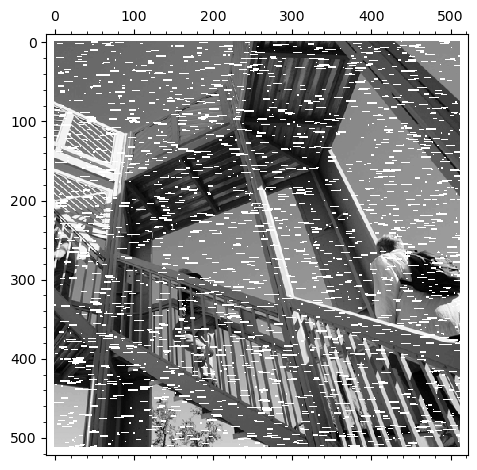

In [27]:
# Vamos a crear agujeros en A
B=A*0
for _ in range(4000):
    a=int(random()*A.shape[0])
    b=int(random()*A.shape[1])
    c=a+int(random()*3)
    d=b+int(random()*14)
    A[a:c,b:d]=0
    B[a:c,b:d]=1
matrix_plot(-A)

Vamos a resolver el problema de Dirichlet con condiciones frontera los valores de la imagen conocidos y como región a resolver la zona marcada como huecos. Para ello, en lugar de plantear el sistema de ecuaciones, usaremos que el problema de Dirichlet es equivalente a la convolución con la matriz
$$
\left(\begin{array}{rrr}
0 & -1 & 0 \\
-1 & 4 & -1 \\
0 & -1 & 0
\end{array}\right)
$$
Para resolver el sistema, podemos aplicar el método de Jacobi con relajación, que en este caso es hacer la convolución con la matriz
$$
\left(\begin{array}{rrr}
0 & w/4 & 0 \\
w/4 & 1-w & w/4 \\
0 & w/4 & 0
\end{array}\right)
$$
donde el parámetro $w$ lo elegimos.

In [28]:
# Resolvemos numéricamente la ecuación de Dirichlet para rellenar los huecos
w=0.9
C = np.array([[ 0,     w/4,     0],
              [ w/4,   1-w,   w/4],
              [ 0,     w/4,     0]])
D=copy(A)
for _ in range(400):
    D = (1-B)*D+B*signal.convolve2d(D,C,mode='same')

In [29]:
matrix_plot(-D)

En el siguiente ejemplo, se realiza el mismo procedimiento con una imagen png a color. Los píxeles que faltan se obtienen porque son aquellos que están en color negro. El procedimiento es análogo, únicamente que en este caso hay cuatro canales (4 matrices) y hay que hacerlo para cada una de ellas. 

In [30]:
import numpy as np
from scipy import signal
import matplotlib.image as mpimg
img=mpimg.imread('badajoz_rallado.png') 
B=img[:,:,0]==0
matrix_plot(img)

In [31]:
# Resolvemos numéricamente la ecuación de Dirichlet para rellenar los huecos
# Tenemos que hacerlo cuatro veces, una para cada canal de la imagen
w=0.9
C = np.array([[ 0,     w/4,     0],
              [ w/4,   1-w,   w/4],
              [ 0,     w/4,     0]])
D0=copy(img[:,:,0])
for _ in range(400):
    D0 = (1-B)*D0+B*signal.convolve2d(D0,C,mode='same')
D1=copy(img[:,:,1])
for _ in range(400):
    D1 = (1-B)*D1+B*signal.convolve2d(D1,C,mode='same')
D2=copy(img[:,:,2])
for _ in range(400):
    D2 = (1-B)*D2+B*signal.convolve2d(D2,C,mode='same')
D3=copy(img[:,:,3])
for _ in range(400):
    D3 = (1-B)*D3+B*signal.convolve2d(D3,C,mode='same')

In [32]:
# Ahora creamos una imagen con los 4 canales
A = copy(img)
A[:,:,0]=D0
A[:,:,1]=D1
A[:,:,2]=D2
A[:,:,3]=D3
matrix_plot(A)

## Ejercicios 
1. Resolver la ecuación de Laplace en un cuadrado con valores frontera constantes no nulos, con $n=2$ y con $n=3$ en ambos ejes. Para ello, calcula "manualmente" el vector $b$. 
2. Idem, pero con valores frontera las funciones $a(x)=x$, $c(y)=x$, $b(x)=1-x$, $d(y)=1-y$.
3. Resolver el problema del apartado anterior con cualquier $n$. Probar también con otras condiciones frontera. Fíjate que únicamente faltaría calcular el vector $b$. Para ello, piensa en los "if" que aparecen en la construcción de la matriz $A$. Usando una cláusula "else" puedes ir construyendo las condiciones de frontera. 

### 1

In [136]:
def pos(i,j,n):
    return i+j*n

In [137]:
n = 2
A = matrix.zero(n^2,sparse=true)
b = vector([ 2,2 , 2,2 ])
for i in range(n):
    for j in range(n):
        pij = pos(i,j,n)
        A[pij,pij] = 4
        if i>0:
            A[pij,pos(i-1,j,n)]=-1
        if j>0:
            A[pij,pos(i,j-1,n)]=-1
        if i<n-1:
            A[pij,pos(i+1,j,n)]=-1
        if j<n-1:
            A[pij,pos(i,j+1,n)]=-1

In [138]:
v = A\b
U = matrix([v[i*n:i*n+n] for i in range(n)])
show(U)

[1 1]
[1 1]

In [139]:
n = 3
A = matrix.zero(n^2,sparse=true)
b = vector([ 2,1,2 , 1,0,1 , 2,1,2 ])
for i in range(n):
    for j in range(n):
        pij = pos(i,j,n)
        A[pij,pij] = 4
        if i>0:
            A[pij,pos(i-1,j,n)]=-1
        if j>0:
            A[pij,pos(i,j-1,n)]=-1
        if i<n-1:
            A[pij,pos(i+1,j,n)]=-1
        if j<n-1:
            A[pij,pos(i,j+1,n)]=-1

In [140]:
v = A\b
U = matrix([v[i*n:i*n+n] for i in range(n)])
show(U)

[1 1 1]
[1 1 1]
[1 1 1]

### 2

In [147]:
n = 2
A = matrix.zero(n^2,sparse=true)
b = vector([ 2/3,4/3 , 4/3,2/3 ])
for i in range(n):
    for j in range(n):
        pij = pos(i,j,n)
        A[pij,pij] = 4
        if i>0:
            A[pij,pos(i-1,j,n)]=-1
        if j>0:
            A[pij,pos(i,j-1,n)]=-1
        if i<n-1:
            A[pij,pos(i+1,j,n)]=-1
        if j<n-1:
            A[pij,pos(i,j+1,n)]=-1

In [148]:
v = A\b
U = matrix([v[i*n:i*n+n] for i in range(n)])
p(x,y) = x+y-2*x*y
V = matrix([ [p(xk,yk) for xk in [1/3,2/3]] for yk in [1/3,2/3] ])
show(U,V)

[4/9 5/9]
[5/9 4/9] [4/9 5/9]
[5/9 4/9]

In [150]:
n = 3
A = matrix.zero(n^2,sparse=true)
b = vector([ 1/2,1/2,3/2 , 1/2,0,1/2 , 3/2,1/2,1/2 ])
for i in range(n):
    for j in range(n):
        pij = pos(i,j,n)
        A[pij,pij] = 4
        if i>0:
            A[pij,pos(i-1,j,n)]=-1
        if j>0:
            A[pij,pos(i,j-1,n)]=-1
        if i<n-1:
            A[pij,pos(i+1,j,n)]=-1
        if j<n-1:
            A[pij,pos(i,j+1,n)]=-1

In [152]:
v = A\b
U = matrix([v[i*n:i*n+n] for i in range(n)])
p(x,y) = x+y-2*x*y
V = matrix([ [p(xk,yk) for xk in [1/4,1/2,3/4]] for yk in [1/4,1/2,3/4] ])
show(U,V)

[3/8 1/2 5/8]
[1/2 1/2 1/2]
[5/8 1/2 3/8] [3/8 1/2 5/8]
[1/2 1/2 1/2]
[5/8 1/2 3/8]

In [153]:
plot3d(p(x,y),(x,0,1),(y,0,1))

Graphics3d Object